In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Estimates from Sample Covariance

### Monthly Returns
Since we will generate cosine similarity estimates in the next notebook using business description of companies from 2016 to 2018. We only consider monthly returns before 2019.

In [3]:
#returns_data = pd.read_csv('../data/returns_2018_top5_SIC.csv', 
#                      parse_dates = ['DATE'], 
#                      usecols = ["trt1m", "CIK", "name", "DATE"])

In [4]:
# TAKE OUT THE DATA before 2019 and reset index
#end_date = pd.to_datetime('2019-01-01')
#returns = returns_data.loc[returns_data['DATE'] < end_date]

# drop the missing value
#returns = returns.dropna()
# group the data by name and date
#group_returns = returns.groupby(['name', 'DATE'])
# calculate the percentage return
#group_returns_pct = group_returns.agg({"trt1m": (lambda x:  x/100)})
#r_selected = group_returns_pct.unstack()
# drop the first index
#r_selected.columns = r_selected.columns.droplevel(0)

In [5]:
# there are some rows containing more than one float number (array of multiple returns)
#for i in range(len(r_selected)):
#    if type(r_selected.iloc[i,1]) == np.ndarray:
#        r_selected = r_selected.drop(index = r_selected.index[i])
# convert object to float
#r_selected = r_selected.astype(float)
# drop missing values rows
#r_selected = r_selected.dropna()
#r_selected.to_csv("filtered_r.csv")
# get the mean of all 
#mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
#cov = r_selected.T.cov()

In [6]:
r_selected = pd.read_csv("filtered_r.csv")
# get the mean of all 
r_selected.set_index("name", inplace = True)
mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
cov = r_selected.T.cov()

### Perform Mean-Variance Analysis

In [12]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [13]:
# get the names of the companies in the pharmaceutical preparations industry
Pharm = df[df.SIC == 2834]
Pharm_list = Pharm.index

In [14]:
# get the companies name that match return data and business description data
SET = (set(Pharm_list) & set(r_selected.index))
LIST = [*SET, ]

#### Mean and Covariance for Returns in the Pharmaceutical Preparations Industry

In [15]:
mu_Pharm = mu[LIST]

In [16]:
tmp = cov[LIST].T
cov_Pharm = tmp[LIST]

### Minmum Volatility Portfolio Weights 

#### Comparing sample mean and covariance

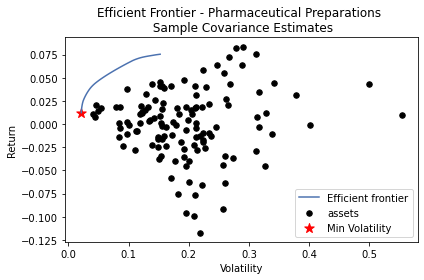

In [24]:
ef1 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - Pharmaceutical Preparations \n Sample Covariance Estimates")
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Returns.png', dpi=200, bbox_inches='tight')
plt.show()

##### min volatility

In [25]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.1%
Sharpe Ratio: -0.35


In [26]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)

In [27]:
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("min_vol_returns.csv")
import dataframe_image as dfi
min_vol.dfi.export('min_vol_returns.png')

[0417/034821.839128:INFO:headless_shell.cc(659)] Written to file /var/folders/6t/0lh6qmkn1zg8fhlp984cpxrr0000gn/T/tmp31sdn97k/temp.png.


In [28]:
min_vol

,Company_Name,Weight
0,"IMPRIMIS PHARMACEUTICALS, INC.",0.04181
1,VTV THERAPEUTICS INC.,0.02372
2,MANNKIND CORP,0.02048
3,STEMLINE THERAPEUTICS INC,0.04273
4,BIODELIVERY SCIENCES INTERNATIONAL INC,0.03680
5,"PROPHASE LABS, INC.",0.05120
6,JOHNSON & JOHNSON,0.17878
7,"HEAT BIOLOGICS, INC.",0.00297
8,PFENEX INC.,0.03777
9,ZOETIS INC.,0.01195


### Get results for the other 4 industries

In [29]:
SIC_list = [7372, 1311, 6798, 6022]
SIC_desc = ['Prepackaged Software (mass reproduction of software)', 'Crude Petroleum and Natural Gas', 
           'Real Estate Investment Trusts', 'State Commercial Banks (commercial banking)']

#### Real Estate Investment Trusts

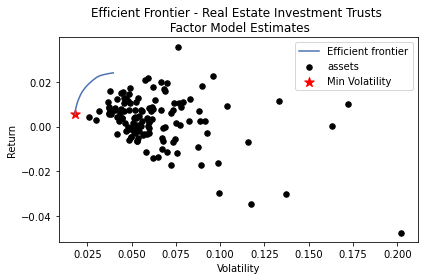

In [30]:
SIC = SIC_list[2]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### min volatility

In [31]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.5%
Annual volatility: 1.8%
Sharpe Ratio: -0.80


In [32]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)

In [33]:
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("min_vol_sample" + str(industry_name) + ".csv")
import dataframe_image as dfi
min_vol.dfi.export('min_vol_sample' + str(industry_name) + '.png')
min_vol

[0417/034828.883417:INFO:headless_shell.cc(659)] Written to file /var/folders/6t/0lh6qmkn1zg8fhlp984cpxrr0000gn/T/tmpnlqhbc_1/temp.png.


,Company_Name,Weight
0,LADDER CAPITAL CORP,0.04420
1,EQUITY COMMONWEALTH,0.20000
2,NEW YORK MORTGAGE TRUST INC,0.02084
3,BRT APARTMENTS CORP.,0.01724
4,IMPAC MORTGAGE HOLDINGS INC,0.05108
5,ALEXANDERS INC,0.02285
6,HMG COURTLAND PROPERTIES INC,0.12513
7,PUBLIC STORAGE,0.10938
8,GREAT AJAX CORP.,0.20000
9,CIM COMMERCIAL TRUST CORP,0.05461


#### State Commercial Banks (commercial banking)

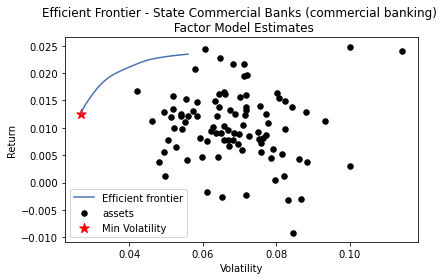

In [34]:
SIC = SIC_list[3]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### min volatility

In [35]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.7%
Sharpe Ratio: -0.28


In [36]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)

In [37]:
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("min_vol_sample" + str(industry_name) + ".csv")
import dataframe_image as dfi
min_vol.dfi.export('min_vol_sample' + str(industry_name) + '.png')
min_vol

[0417/034834.553092:INFO:headless_shell.cc(659)] Written to file /var/folders/6t/0lh6qmkn1zg8fhlp984cpxrr0000gn/T/tmpb18uo0p8/temp.png.


,Company_Name,Weight
0,GUARANTY FEDERAL BANCSHARES INC,0.17724
1,BANK OF NEW YORK MELLON CORP,0.09533
2,CITIZENS & NORTHERN CORP,0.05375
3,VILLAGE BANK & TRUST FINANCIAL CORP.,0.13994
4,FIRST COMMUNITY CORP /SC/,0.05076
5,"RELIANT BANCORP, INC.",0.12273
6,MACKINAC FINANCIAL CORP /MI/,0.02478
7,"CAROLINA TRUST BANCSHARES, INC.",0.11786
8,"FAUQUIER BANKSHARES, INC.",0.02143
9,BANK OF THE JAMES FINANCIAL GROUP INC,0.00178
